**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Yuxiang Hong
- Claire Gao
- Milo Li
- Erin Li
- Xinyi Zhang

# Research Question

How do variations in theta and beta EEG frequency band activity correlate with levels of student-reported confusion when viewing educational videos of differing complexity, and to what extent can these EEG patterns be used to predict confusion states in real time?



## Background and Prior Work

The rapid development of online education, particularly through Massive Open Online Courses (MOOCs), has opened up more opportunities for students worldwide to access a diverse range of study resources. However, unlike traditional classrooms that facilitate active interactions between instructors and students, online learning often lacks immediate feedback mechanisms. This limitation can make it difficult to identify and address moments of student confusion, which can hinder comprehension and motivation if left unresolved.

To tackle this issue, recent research has explored the use of electroencephalography (EEG) technology to detect cognitive states such as confusion in online learning environments. In the paper Using EEG to Improve Massive Open Online Courses Feedback Interaction, Wang et al. conducted a pilot study investigating the potential of EEG-based methods for identifying confusion among students while viewing MOOC videos. During the study, EEG data was collected from students as they watched video clips designed to evoke varying levels of comprehension—from basic topics assumed to be clear for college students (e.g., introductory algebra) to more complex subjects (e.g., quantum mechanics and stem cell research). Using a single-channel EEG device, the researchers captured data on brain activity from the frontal lobe, a region associated with cognitive processing and emotional response. Afterward, students self-reported their confusion levels on a scale from 1 (least confusing) to 7 (most confusing), generating both predefined and self-reported labels of confusion. By training machine learning classifiers on the EEG data, the researchers demonstrated a moderate ability to distinguish between confusing and non-confusing experiences, achieving accuracies that, while limited, were above random chance and comparable to human observers interpreting student body language.1 These findings suggest the feasibility of EEG technology as a tool for detecting confusion in educational settings, which could support more adaptive and responsive online learning environments.

Our project builds upon Wang et al.'s foundational work by applying EEG data analysis to further understand and classify confusion states in students. Similar to their study design, we utilize a dataset containing EEG data collected from 10 college students while they engage with educational video clips that range from basic to complex topics. We analyze the average EEG signals with higher frequency data over every 0.5 seconds as students watch these videos, alongside their self-reported confusion ratings.

Based on provious works, different brain wave frequencies are associated with different cognitive states (Kaushik et al).

Theta Waves (4–8 Hz): Theta waves are often associated with memory formation, learning, and attention. Alpha Waves (8–13 Hz): Alpha waves are most commonly linked to relaxation and reduced attentional demands. Beta Waves (13–28 Hz): Beta waves are generally associated with active cognitive processing and engagement in problem-solving tasks.2 Therefore, By monitoring shifts in these frequency bands, we could potentially predict instances of confusion in real time, enabling insights into how students process and react to different educational stimuli.

By analyzing this EEG recording data, our project aims to use students’ confusion score ratings to build machine learning models that accurately classify instances of student confusion. The insights gained could support the future development of applications in online education, such as real-time adaptive learning systems that adjust content based on student engagement and cognitive load. Ultimately, this project seeks to contribute to a more personalized and effective online learning experience, utilizing EEG data to bridge the feedback gap inherent in remote education.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Wang, H., Li, Y., Hu, X., Yang, Y., Meng, Z., & Chang, K. M. (2013, June). Using EEG to Improve Massive Open Online Courses Feedback Interaction. [Link to paper](https://www.cs.cmu.edu/~kkchang/paper/WangEtAl.2013.AIED.EEG-MOOC.pdf)
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kaushik, P., Moye, A., Vugt, M.v. et al. Decoding the cognitive states of attention and distraction in a real-life setting using EEG. Sci Rep 12, 20649 (2022). [Link to paper](https://doi.org/10.1038/s41598-022-24417-w)

# Hypothesis



We hypothesize that by recording EEG data while students watch lecture videos, we can predict moments of confusion. Specifically, we predict that beta (12-29 Hz) and gamma (30-100 Hz) band activity will increase as confusion intensifies, with a 20% or greater rise in power from baseline levels during moments of high cognitive load. This increase will enable us to classify confusion instances accurately. We expect beta waves to correlate with heightened cognitive engagement, as students attempt to process complex information, while gamma activity may reflect the effort involved in integrating and making sense of new content. To quantify these changes, we will measure the percent change in power across these bands and establish a threshold (e.g., 0.5 correlation coefficient) for significant associations with confusion scores. We will use statistical tests (e.g., t-tests) to confirm that the observed increases differ significantly from baseline and conduct a classification analysis to determine the predictive accuracy of EEG patterns in identifying confusion states.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Confused student EEG brainwave data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 100
  - Number of variables: 10
- Dataset #2 (if you have more than one!)
  - Dataset Name: Demographic data
  - Link to the dataset: https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data
  - Number of observations: 10
  - Number of variables: 3


EEG Data (EEG_confused.csv): This dataset contains electroencephalography (EEG) readings for various subjects while they watched different educational videos, identified by the VideoID variable. Important variables include Attention, Meditation, Raw, Delta, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, and Gamma2, which represent metrics of brainwave activity in different frequency bands. These metrics are proxies for cognitive states, with frequencies like Theta and Beta potentially indicating levels of focus or confusion. The variable we try to predict is user-definedlabeln, which represents confusion level, 1 is confused and 0 is not confused. Data types include floats. Preprocessing steps might involve handling missing values, normalizing EEG signals, and converting categorical columns from float to integer data types for model input.

Demographic Data (demographic_info.csv): This dataset likely includes demographic information for each participant, which may include variables such as SubjectID, Age, Gender, Education Level, and potentially additional personal or socioeconomic characteristics. These variables provide context for individual differences in cognitive responses, with Age and Education Level possibly affecting EEG outcomes or interpretations. Data types are likely to be a mix of integers (for IDs and age), categorical (for gender and education level), and strings or floats for other characteristics. Preprocessing would involve cleaning categorical data, encoding categorical variables as needed, and ensuring IDs match those in the EEG dataset for accurate merging.

We plan to merge these two datasets into a single dataframe with inner merge on SubjectID.

# Results

## Exploratory Data Analysis

### Section 1 of EDA -Data Checking and initial Processing

## Setup

In [1]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

## EEG_Data

In [2]:
# Data run in local
data= pd.read_csv("project_data/EEG_data.csv") # Need to change the path to "COGS 108/project_data/EEG_data.csv" in github
file_names = {
    0: 'physics_0.m4v',
    1: 'calculus_1.m4v',
    2: 'calculus_2.m4v',
    3: 'alegbra_3.m4v',
    4: 'alegbra_4.m4v',
    5: 'physics_5.m4v',
    6: 'Stem_Cell_6.m4v',
    7: 'analog_signals.m4v',
    8: 'digital_signals.m4v',
    9: 'audio_signals.m4v'
}
data['VideoID'] = data['VideoID'].map(file_names)
data.to_csv("EEG_confused.csv",index=False)
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


Then, we load in the EEG data

In [3]:
eeg_df = pd.read_csv("EEG_confused.csv") # Need to change the path to "COGS 108/project_data/EEG_confused.csv" in github
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


We convert SubjectID, predefinedlabel, and user-definedlabeln to integer, since they are in fact integers but presented as floats.

In [4]:
eeg_df['SubjectID'] = eeg_df['SubjectID'].astype(int)
eeg_df['predefinedlabel'] = eeg_df['predefinedlabel'].astype(int)
eeg_df['user-definedlabeln'] = eeg_df['user-definedlabeln'].astype(int)
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0


We renamed user-definedlabeln to "confused" where 1 is confused, 0 is not confused

In [5]:
eeg_df = eeg_df.rename(columns = {'user-definedlabeln': 'confused'})

## Demographic data

We renamed the column 'subject ID' to 'SubjectID' to match the EEG data

In [6]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
demo_df = pd.read_csv("project_data/demographic_info.csv") # Need to change the path to "COGS 108/project_data/demographic_info.csv" in github
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


Merging the two dataset on SubjectId We merge the EEG data with demographic data based on the SubjectID column to enrich the dataset with additional features.

In [7]:
df = eeg_df.merge(demo_df,how = 'inner',on = 'SubjectID')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age,ethnicity,gender
0,0,physics_0.m4v,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,25,Han Chinese,M
1,0,physics_0.m4v,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,25,Han Chinese,M
2,0,physics_0.m4v,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,25,Han Chinese,M
3,0,physics_0.m4v,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,25,Han Chinese,M
4,0,physics_0.m4v,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,25,Han Chinese,M


In [8]:
df.describe()

,SubjectID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,confused,age
count,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000
mean,4.487394,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960
std,2.865373,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148
min,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000
25%,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000
50%,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000
75%,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000
max,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000


## Data Cleaning

Handling missing values

In [9]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()
missing_values_count, columns_with_missing_values

(SubjectID          0
 VideoID            0
 Attention          0
 Mediation          0
 Raw                0
 Delta              0
 Theta              0
 Alpha1             0
 Alpha2             0
 Beta1              0
 Beta2              0
 Gamma1             0
 Gamma2             0
 predefinedlabel    0
 confused           0
 age                0
 ethnicity          0
 gender             0
 dtype: int64,
 [])

We explored the dataset and found no missing values, thus we don't need to handle missing values

Checking for Duplicates

In [14]:
print(df.duplicated().sum())

0


Checking data types

In [15]:
print(df.dtypes)

SubjectID            int32
VideoID              int32
Attention          float64
Mediation          float64
Raw                float64
Delta              float64
Theta              float64
Alpha1             float64
Alpha2             float64
Beta1              float64
Beta2              float64
Gamma1             float64
Gamma2             float64
predefinedlabel      int32
confused             int32
age                  int64
ethnicity            int32
gender               int32
dtype: object


Checking For Outliers

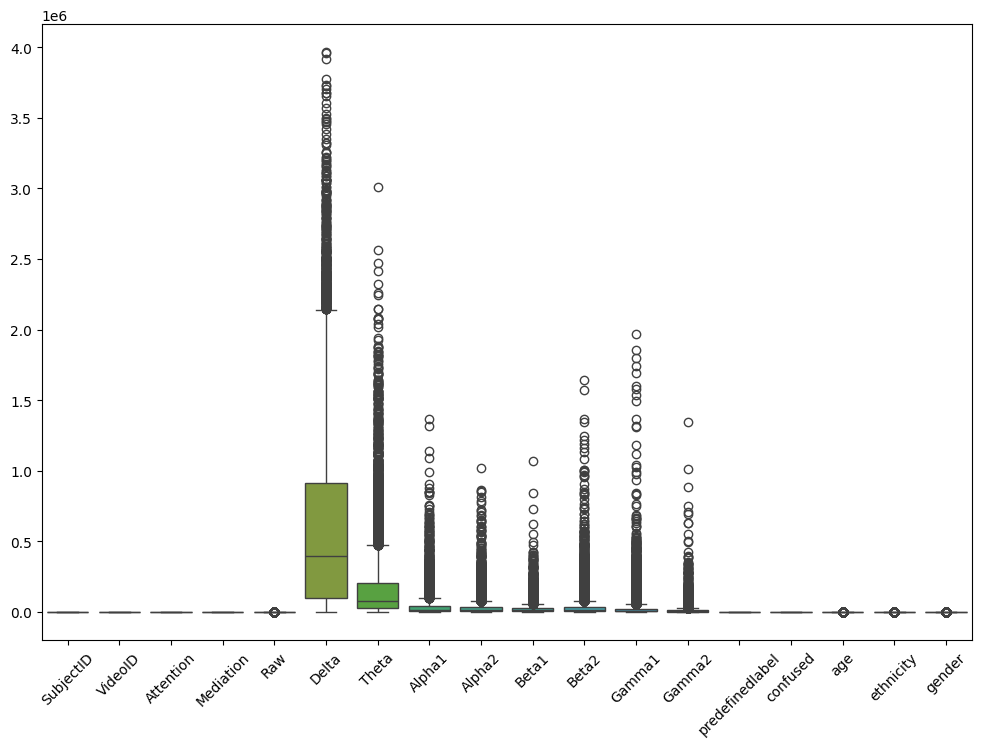

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
xticks = plt.xticks(rotation=45)
plt.show()

Handle Outliers by removing outliers using IQR

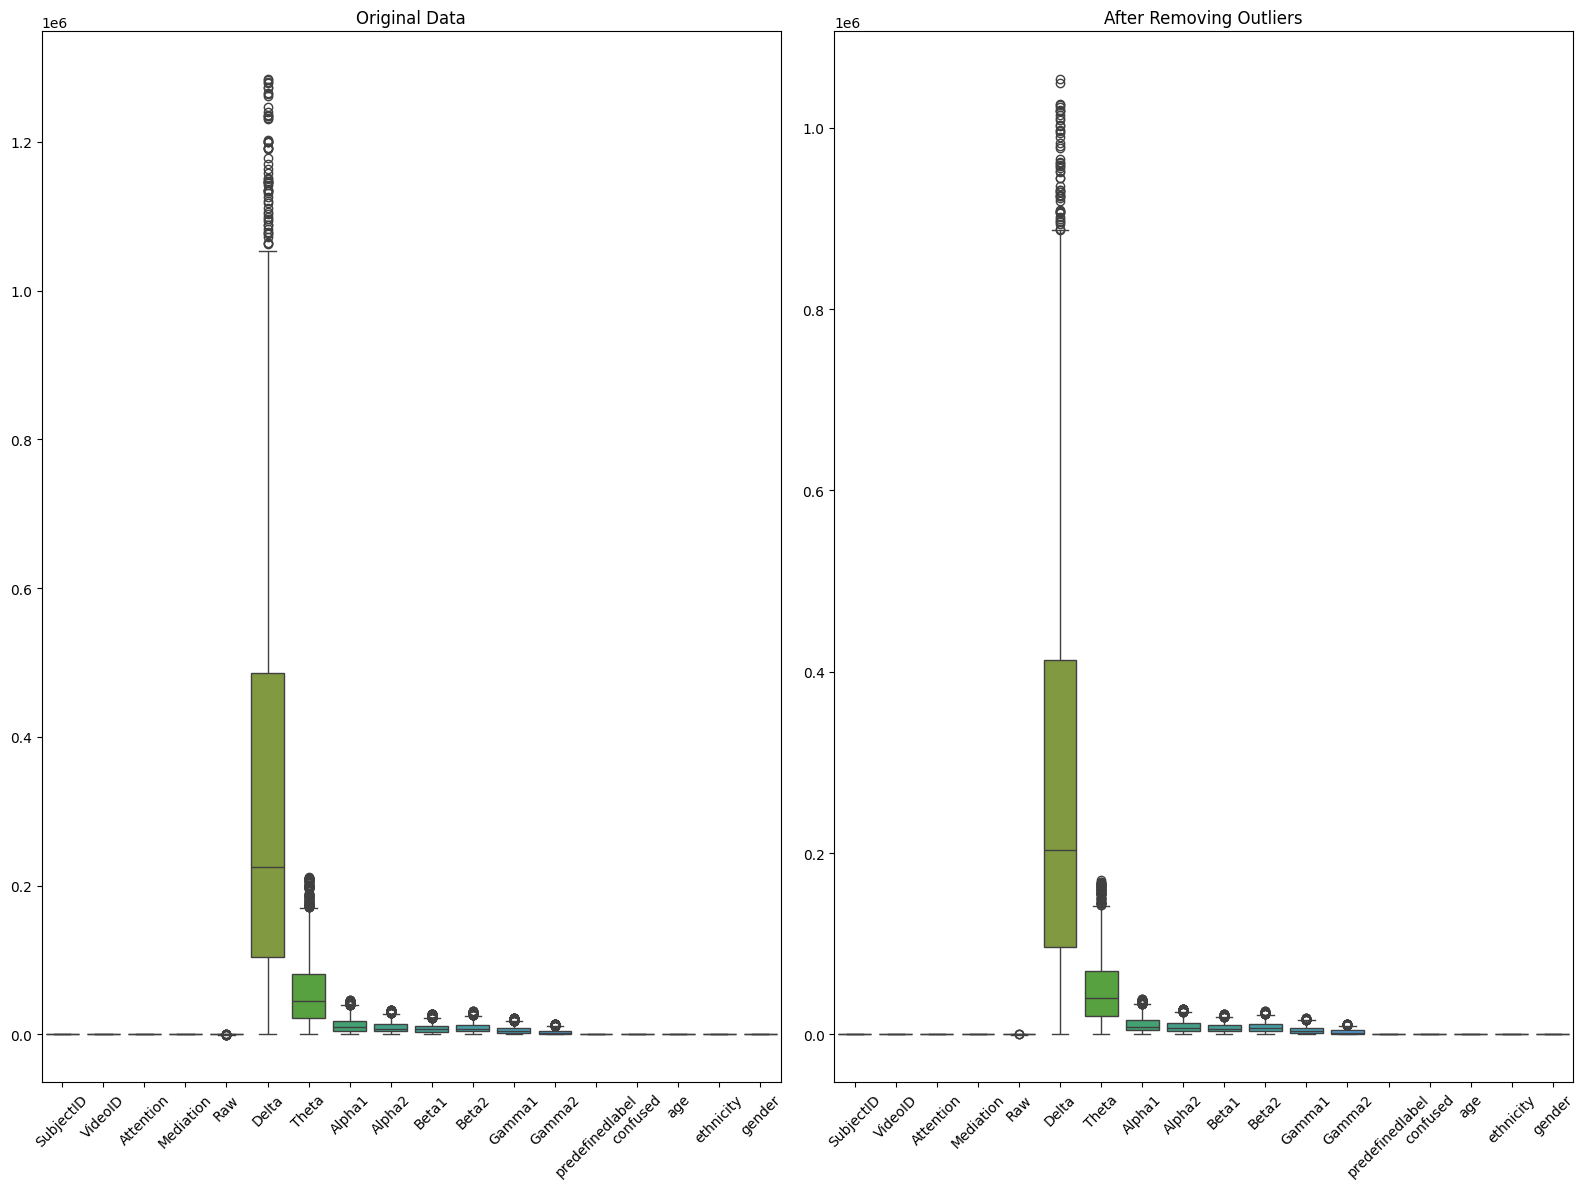

In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# set the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Boxplot before and after removing outliers
plt.figure(figsize=(16, 12))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
xticks = plt.xticks(rotation=45)
plt.title('Original Data')

# Cleaned data boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned)
xticks = plt.xticks(rotation=45)
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()

Feture engineering
Encode categorical variables (ethnicity, gender, VideoID) into numerical values to make them suitable for machine learning algorithms.

In [10]:
# label encoders
ethnicity_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
videoid_encoder = LabelEncoder()

# Applying Label Encoding to 'ethnicity' and 'gender' columns
df['ethnicity'] = ethnicity_encoder.fit_transform(df['ethnicity'])
df['gender'] = gender_encoder.fit_transform(df['gender'])
df['VideoID'] = videoid_encoder.fit_transform(df['VideoID'])

print(df.head())

ethnicity_mapping = dict(zip(ethnicity_encoder.classes_, ethnicity_encoder.transform(ethnicity_encoder.classes_)))
gender_mapping = dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_)))
videoid_mapping = dict(zip(videoid_encoder.classes_, videoid_encoder.transform(videoid_encoder.classes_)))

print("\nEthnicity Mapping:")
print(ethnicity_mapping)

print("\nGender Mapping:")
print(gender_mapping)

print("\nVideoID Mapping:")
print(videoid_mapping)

   SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0          0        8       56.0       43.0  278.0   301963.0   90612.0   
1          0        8       40.0       35.0  -50.0    73787.0   28083.0   
2          0        8       47.0       48.0  101.0   758353.0  383745.0   
3          0        8       47.0       57.0   -5.0  2012240.0  129350.0   
4          0        8       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0                0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0                0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0                0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0                0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0                0   

   confused  age  ethnicity  gender  
0         0   25          2       1  
1   

## Discovering Relationship between variables

We first step is to understand the data we will use in the Exploratory Data Analysis, and through drawing the plots of correlations between each pair of variables to discover the relationships between these used variables

Checking Feature Contribution

We generate the correlation heatmap to show the pairwise correlation between the columns (features) in our dataset, providing a visual summary of how different variables relate to each other.

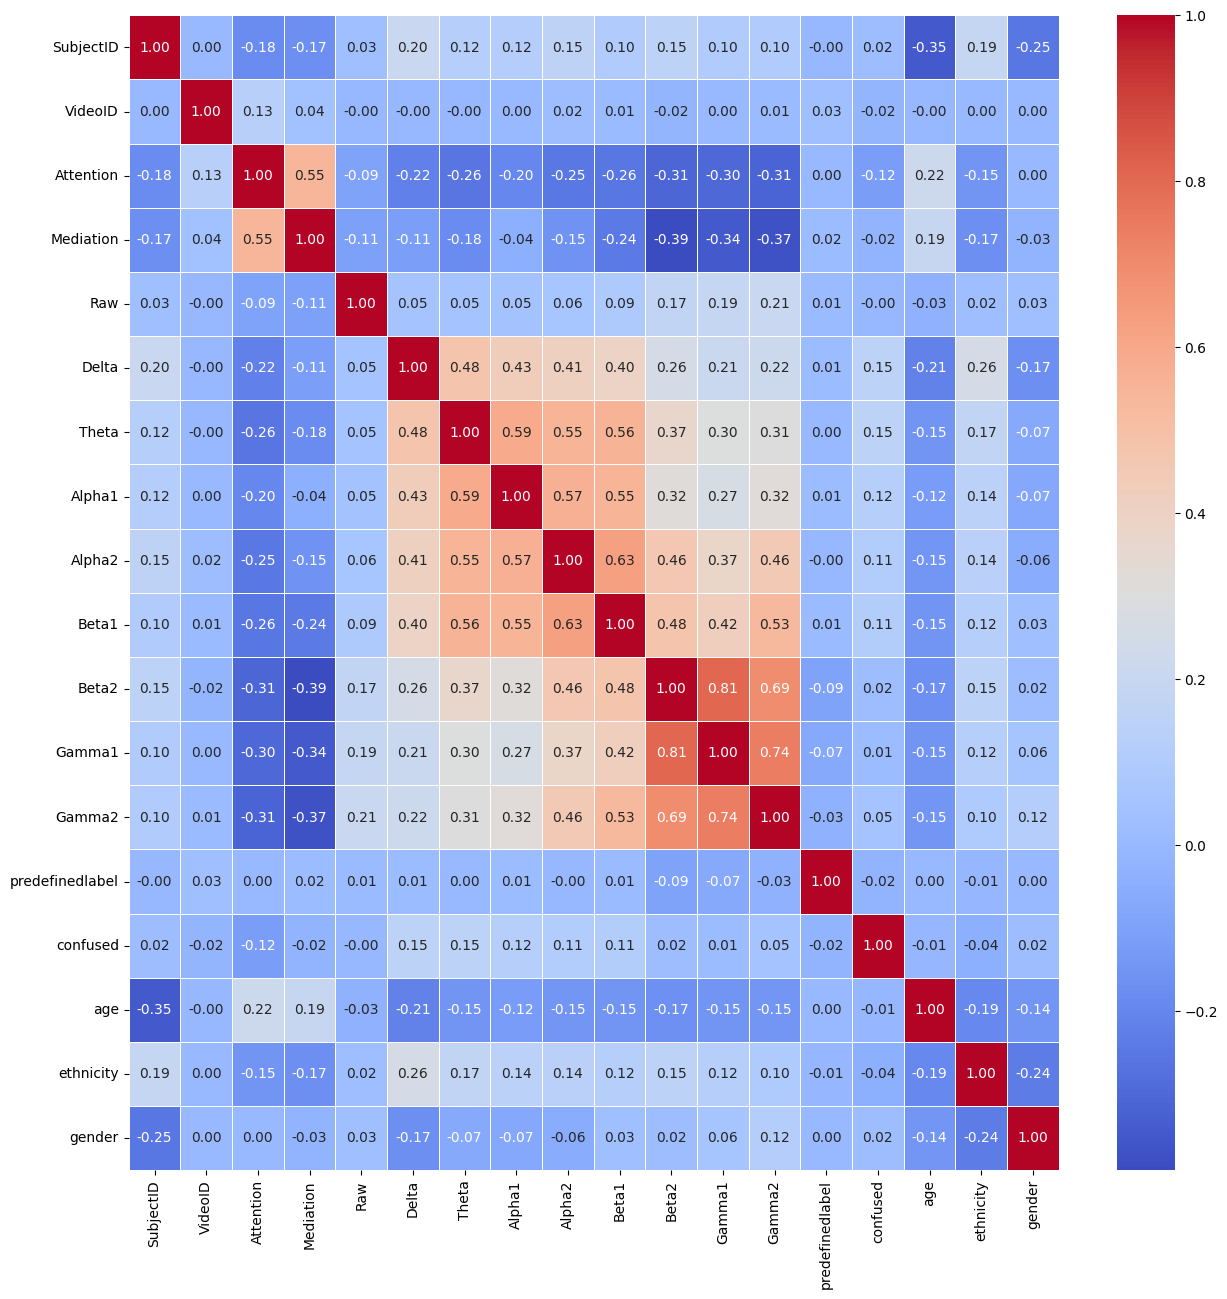

In [11]:
plt.figure(figsize=(15, 15))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.show()

In order to better find the strongest correlations between every two variables, we sort the correlation matrix and potentially reorder the variables.

In [12]:
# Sort the correlation matrix by absolute correlation values
sorted_cor_matrix = cor_matrix.abs().unstack().sort_values(ascending=False)

# Remove duplicate pairs (since A with B = B with A) and self-correlations (where correlation is 1, which makes sense)
sorted_cor_matrix = sorted_cor_matrix[sorted_cor_matrix < 1]
sorted_cor_matrix = sorted_cor_matrix[sorted_cor_matrix.index.get_level_values(0) < sorted_cor_matrix.index.get_level_values(1)]

print(sorted_cor_matrix)


Beta2      Gamma1             0.808930
Gamma1     Gamma2             0.739836
Beta2      Gamma2             0.692584
Alpha2     Beta1              0.626824
Alpha1     Theta              0.586956
                                ...   
Raw        confused           0.001465
Attention  gender             0.001373
age        predefinedlabel    0.000649
Raw        VideoID            0.000443
Gamma1     VideoID            0.000052
Length: 153, dtype: float64


Based on the output, we can sum it to three kinds of correlations:

**Strong Correlations**: Beta2 & Gamma1 (0.81), Gamma1 & Gamma2 (0.74), and Beta2 & Gamma2 (0.69): These variables are highly correlated, suggesting they are closely related and may share some common patterns.

**Moderate Correlations**: Alpha2 & Beta1 (0.63), Alpha1 & Theta (0.59): These show moderate positive correlations, indicating that there might be some degree of relationship.

**Weak Correlations**: Raw & Confused (0.001), Attention & Gender (0.001), Age & Predefinedlabel (0.0006), and Gamma1 & VideoID (0.00005): These correlations are very weak, suggesting little to no linear relationship between the variables.

Through these, we can better determine which correlations we would be more interested in during our analysis process, and it also helps us rule out some irrelevance.

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [13]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

Our group’s EEG data analysis project considers various ethical issues at each research stage.

During data preparation, we will critically assess how authentic the dataset represents the population, as EEG data can vary widely among individuals. Before using the data, we could check out the original data collection methods to ensure the consent and anonymity for the participants, and addressing risks of potential re-identification from EEG patterns.

In the analysis phase, we have ethical concerns in the processes and bias for data. EEG data is highly sensitive to signal noise, so it requires careful prapration to avoid misinterpretating the data, which could lead to false conclusions on confusion levels. We will try our best to ensure analysis accuracy, to minimizing misleading our further discussion in educational interventions based on our results.

We are also mindful of the societal implications. The misinterpretations of out result could impact students if used in educational tech, potentially leading to undue stress. Hence, our group commits to transparency in reporting and emphasizes the limitations of EEG-based assessments in real-world applications.

EEG data we plan to use is from a diverse sample of students, which would ideally represent a range of cognitive states across different learning backgrounds. However, the real dataset we are analyzing includes a relatively small sample of students (from 10 colleges) which could lead to significant bias. The size and demographics of the sample may not enough to capture the diversity of cognitive responses to online learning. In details, different cultural, educational, or socioeconomic backgrounds may influence how students report and experience confusion, which is not adequately represented in the dataset. Our group could address this by acknowledging the limitations of our dataset’s sample size and participant diversity, and apply techniques to adjust for potential bias during analysis. Include stratify the results based on available demographic factors and discussing these limitations in our final report.

To detect potential bias during the analysis, we split our dataset into each possible subgroup depending on the demographic factors to ensure that the model does not overfit to certain patterns of confusion. We would also consider incorporating additional available datasets to further refine the generalizability and stability of the model.

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

Team Expectation 1: Ensure data accuracy and privacy - Everyone on the team is responsible for the accuracy of the data, especially the data collection and processing process, to ensure that the records are standardized and there are no omissions or errors. The privacy of participants is a top priority, and all collected data must be processed and stored in strict accordance with ethical requirements, so that the data is anonymized to avoid any risk of privacy disclosure.

Team Expectation 2: Clear communication and transparent information - Team members need to maintain good communication and meet at least once a week to share their progress, difficulties, and support needs. Each member should actively participate in the meeting to ensure that everyone is aware of what other members are working on and the overall project progress. All information should be shared as transparently and timely as possible, such as unexpected situations in data collection, questions in analysis, etc., to avoid information lag affecting the progress.

Team Expectation 3: Flexible adjustment, strong adaptability - During the course of the project, new discoveries or methodological adjustments may be encountered, and team members should remain flexible and adjust the research method according to the actual situation. For example, if a preliminary analysis finds that certain EEG signals are more significant, the team may need to focus on analyzing those signals. We need to actively adapt to new technical requirements, such as the development of real-time inspection systems, or the optimization of data analysis methods.

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/15  |  1 PM | Read through project requirements; research for potential topics/questions | Discuss and decide on final project topic; discuss hypothesis | 
| 10/22  |  10 AM |  Do background research on topic | Discuss background research paper and ideal dataset(s); assignment member to write different parts of project proposal| 
| 10/30  | 10 AM  | Finish proposal | Go through the project proposal and check for errors or misunderstanding, turn in project prosal; discuss wrangling/eda |
| 11/1  | 1 PM  | Import & Wrangle Data ; EDA | Discuss Wrangling and possible analytical approaches; Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/13  | 1 PM  | Finalize wrangling/EDA; Begin Analysis  | Discuss/edit Analysis;  turn in data check-in |
| 11/20  | 1 PM  | check feedback of check-in 1 | Discuss check-in2 EDA; assign member to lead different part |
| 11/27  | 1 PM  | Complete check-in2 EDA | Go through check-in2 EDA together and turn it in; discuss the results/conclusion/discussion part |
| 12/5  | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 12/11  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |